In [1]:
import pandas as pd 
import numpy as np


In [2]:
df = pd.read_csv("IOT-temp.csv")

In [3]:
df['out/in'].count()

97606

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [5]:
df.dtypes

id            object
room_id/id    object
noted_date    object
temp           int64
out/in        object
dtype: object

In [6]:
df.tail()

,id,room_id/id,noted_date,temp,out/in
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In
97605,__export__.temp_log_133741_32958703,Room Admin,28-07-2018 07:06,31,In


In [7]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [8]:
df.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [9]:
df1 = df.drop(columns='id',axis = 1)

In [10]:
df1['out/in'].value_counts()/df1['out/in'].count()*100

#here we can we in this data majority of temperature nearly 80% of temperature is taken OUT
# and nearly 20 % time it is taken inside 

out/in
Out    79.155995
In     20.844005
Name: count, dtype: float64

In [11]:

df1.select_dtypes(include=object).columns

Index(['room_id/id', 'noted_date', 'out/in'], dtype='object')

In [12]:
df1['noted_date'] = pd.to_datetime(df1['noted_date'],errors='coerce')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   room_id/id  97606 non-null  object        
 1   noted_date  49944 non-null  datetime64[ns]
 2   temp        97606 non-null  int64         
 3   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.0+ MB


In [14]:
df1.isnull().sum()
#it is 47662 times
#i cannot delete it so i have to think how to do it 

room_id/id        0
noted_date    47662
temp              0
out/in            0
dtype: int64

In [15]:
df1.tail()
#there is NaT (Not a Time) 

,room_id/id,noted_date,temp,out/in
97601,Room Admin,NaT,31,In
97602,Room Admin,NaT,31,In
97603,Room Admin,NaT,31,In
97604,Room Admin,NaT,31,In
97605,Room Admin,NaT,31,In


In [16]:
df2 = df.drop(columns=['id','room_id/id'],axis = 1)
#made a alike dataframe 

In [17]:
df2['noted_date'] = pd.to_datetime(df2['noted_date'],errors='coerce',dayfirst=True)
#by applying dayfirst is can see i am not getting NaT.

In [18]:
df2.tail()

,noted_date,temp,out/in
97601,2018-07-28 07:07:00,31,In
97602,2018-07-28 07:07:00,31,In
97603,2018-07-28 07:06:00,31,In
97604,2018-07-28 07:06:00,31,In
97605,2018-07-28 07:06:00,31,In


In [19]:
df2.isna().sum() 
#no NaT

noted_date    0
temp          0
out/in        0
dtype: int64

In [20]:
df2.dtypes
#and object chnaged to datatime 

noted_date    datetime64[ns]
temp                   int64
out/in                object
dtype: object

In [72]:
df2['temp'].duplicated().count()

97606

In [50]:
df2['hour'] = df2['noted_date'].dt.hour
df2

,noted_date,temp,out/in,hour
0,2018-12-08 09:30:00,29,In,9
1,2018-12-08 09:30:00,29,In,9
2,2018-12-08 09:29:00,41,Out,9
3,2018-12-08 09:29:00,41,Out,9
4,2018-12-08 09:29:00,31,In,9
...,...,...,...,...
97601,2018-07-28 07:07:00,31,In,7
97602,2018-07-28 07:07:00,31,In,7
97603,2018-07-28 07:06:00,31,In,7
97604,2018-07-28 07:06:00,31,In,7


In [51]:
average_temp_hour = df2.groupby('hour')['temp'].mean()
average_temp_hour

hour
0     34.158934
1     34.538142
2     33.804118
3     33.926379
4     35.485874
5     37.397854
6     37.452146
7     35.924620
8     34.931502
9     35.535080
10    35.391457
11    35.082789
12    35.572346
13    35.828893
14    35.423703
15    35.458119
16    34.240194
17    35.135868
18    34.569856
19    33.284057
20    34.367788
21    34.795571
22    33.454163
23    35.409168
Name: temp, dtype: float64

In [69]:
max_temp_hour = df2.groupby('hour')['temp'].max().max()
max_temp_hour

51

In [59]:
in_side = df2[df2['out/in'] == 'In']
in_side

,noted_date,temp,out/in,hour
0,2018-12-08 09:30:00,29,In,9
1,2018-12-08 09:30:00,29,In,9
4,2018-12-08 09:29:00,31,In,9
5,2018-12-08 09:29:00,31,In,9
6,2018-12-08 09:28:00,29,In,9
...,...,...,...,...
97601,2018-07-28 07:07:00,31,In,7
97602,2018-07-28 07:07:00,31,In,7
97603,2018-07-28 07:06:00,31,In,7
97604,2018-07-28 07:06:00,31,In,7


In [60]:
out_side = df2[df2['out/in'] == 'Out']
out_side

,noted_date,temp,out/in,hour
2,2018-12-08 09:29:00,41,Out,9
3,2018-12-08 09:29:00,41,Out,9
10,2018-12-08 09:25:00,42,Out,9
11,2018-12-08 09:25:00,42,Out,9
16,2018-12-08 09:21:00,41,Out,9
...,...,...,...,...
97587,2018-07-28 07:07:00,32,Out,7
97588,2018-07-28 07:07:00,32,Out,7
97594,2018-07-28 07:07:00,32,Out,7
97596,2018-07-28 07:07:00,32,Out,7


In [61]:
in_max_temp = in_side['temp'].max()
in_max_temp

41

In [63]:
in_min_temp = in_side['temp'].min()
in_min_temp

21

In [65]:
in_avg_temp = in_side['temp'].mean()
in_avg_temp

30.4539198820349

In [66]:
out_max_temp = out_side['temp'].max()
out_max_temp

51

In [67]:
out_min_temp = out_side['temp'].min()
out_min_temp

24

In [68]:
out_avg_temp = out_side['temp'].mean()
out_avg_temp

36.265243784056636

In [23]:
#check the data with graph
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='noted_date', ylabel='temp'>

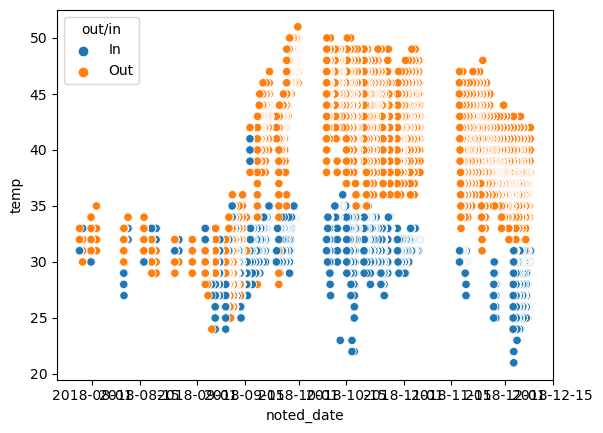

In [26]:
sns.scatterplot(data=df2,x ='noted_date' , y ='temp',hue= 'out/in' )
#here we can see temp outside is more than inside

In [31]:
percentage_in_out = df2['out/in'].value_counts()
percentage_in_out

out/in
Out    77261
In     20345
Name: count, dtype: int64

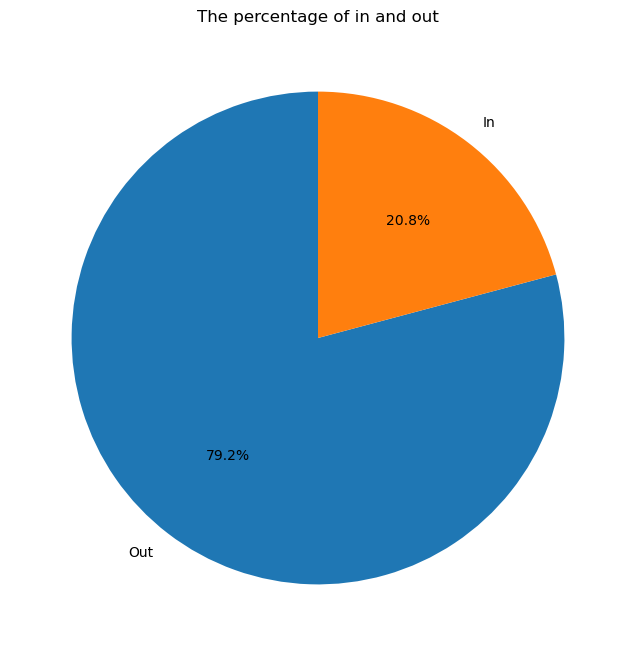

In [41]:
plt.figure(figsize =(8,8))
plt.pie(percentage_in_out,labels=percentage_in_out.index, autopct='%1.1f%%',startangle=90 )
plt.title('The percentage of in and out')
plt.show()

Text(0.5, 1.0, 'percentage of data taken out and in')

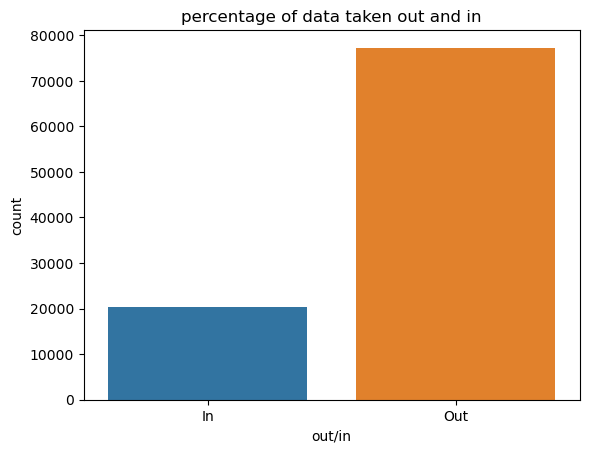

In [32]:
sns.countplot(x = 'out/in',data = df2)
plt.title('percentage of data taken out and in')

C:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temp', ylabel='Count'>

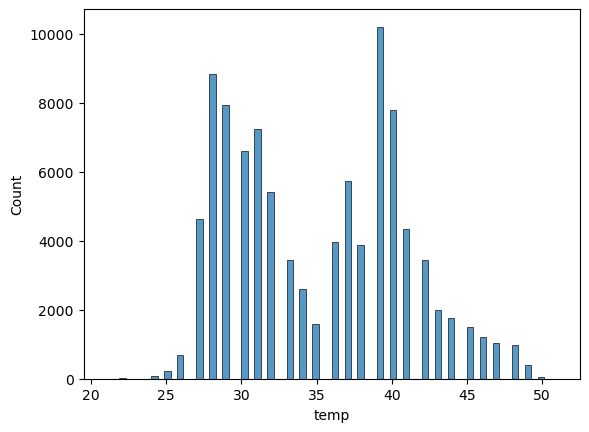

In [47]:
sns.histplot(data = df2,x = 'temp')

In [ ]:
"""
Conclusion-
in this data we saw that -
1. max temp 'OUT' - 51 , max temp 'IN' - 41
2. min temp 'OUT' - 24 , min temp 'IN' - 21
3. avg temp 'OUT' - 36.2 , avg temp 'IN' - 30.4
4. sample taken of out : in - 79.2 : 21.8
5. the average temperature in the day is between 34 to 37


"""

In [45]:
df2

,noted_date,temp,out/in
0,2018-12-08 09:30:00,29,In
1,2018-12-08 09:30:00,29,In
2,2018-12-08 09:29:00,41,Out
3,2018-12-08 09:29:00,41,Out
4,2018-12-08 09:29:00,31,In
...,...,...,...
97601,2018-07-28 07:07:00,31,In
97602,2018-07-28 07:07:00,31,In
97603,2018-07-28 07:06:00,31,In
97604,2018-07-28 07:06:00,31,In


In [48]:
df2.temp.value_counts()

temp
39    10203
28     8831
29     7922
40     7798
31     7236
30     6614
37     5723
32     5408
27     4631
41     4354
36     3965
38     3867
42     3447
33     3437
34     2613
43     2004
44     1774
35     1582
45     1508
46     1201
47     1044
48      971
26      699
49      401
25      224
24       66
50       55
22       19
23        5
21        2
51        2
Name: count, dtype: int64